In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [2]:
X = pd.read_csv('../data/processed/df_train.csv').iloc[::, :18:]
y= pd.read_csv('../data/processed/df_train.csv')['satisfaction']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
scaler.inverse_transform(X_train)

array([[ 1., 41.,  1., ...,  4.,  1.,  0.],
       [ 1., 19.,  1., ...,  4.,  1.,  0.],
       [ 1., 29.,  1., ...,  4.,  1.,  0.],
       ...,
       [ 0., 34.,  1., ...,  2.,  1.,  0.],
       [ 1., 24.,  1., ...,  3.,  1.,  0.],
       [ 1., 52.,  1., ...,  2.,  0.,  1.]])

In [5]:
model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric = 'logloss')
XGB = model.fit(X_train,y_train)



In [6]:
pickle.dump(XGB, open('../models/model_XGB.pkl', 'wb')) 

In [7]:
y_predict = XGB.predict(X_test)

In [8]:

results_xgb = model_selection.cross_val_score(model, X_test,y_predict, cv=10).mean()
results_xgb

0.9865824988953913

In [9]:
with open('../data/variables_pkl/resultado_XGB.pkl', 'wb') as resultado_XGB:
    pickle.dump(('resuktado_XGB', 0.9865824988953913), resultado_XGB)

accuracy score:   0.9632221632318162
precision score:  0.9561939860959879
recall score:     0.9794937794937795
F1 score:         0.9677036534712216
ROC:              0.9608964925712498
------------------------------------------- 
classification report:       
---------------------------------------------       
                    precision    recall  f1-score   support

           0       0.97      0.94      0.96      9064
           1       0.96      0.98      0.97     11655

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



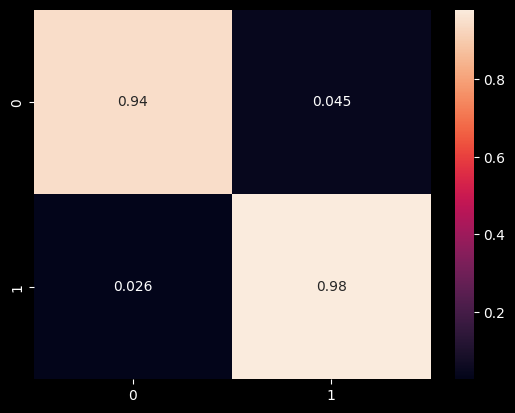

In [10]:
c_mat = confusion_matrix(y_test,y_predict)

sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
print(f'accuracy score:   {accuracy_score(y_test,y_predict)}')
print(f'precision score:  {precision_score(y_test, y_predict)}')
print(f'recall score:     {recall_score(y_test, y_predict)}')
print(f'F1 score:         {f1_score(y_test, y_predict)}')
print(f'ROC:              {roc_auc_score(y_test, y_predict)}')
print('------------------------------------------- ')
print(f'''classification report:       
---------------------------------------------       
      {classification_report(y_test, y_predict)}''')
